In [1]:
# Import packages
import requests
import json
import hvplot.pandas
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
# Import the API key
from config import geoapify_key

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## 30 primary oil companies (from yahoo finance)

In [2]:
# Replace 'oil_company_list.csv' with your actual CSV file path
csv_file_path_2 = 'Resources/30_oil_companies.csv'

oil_company_list_data = pd.read_csv(csv_file_path_2)
oil_company_list_data

,Symbol,Company Name,Last Price,Change,% Change,Market Time,Volume,Avg Vol (3 month),Market Cap
0,XOM,Exxon Mobil Corporation,110.12,0.56,0.51%,4:03 PM EDT,15.79M,15.82M,445.21B
1,CVX,Chevron Corporation,160.83,0.97,0.61%,4:03 PM EDT,8.64M,7.95M,300.66B
2,SHEL,Shell plc,62.32,0.46,0.75%,4:00 PM EDT,3.75M,4.61M,209.05B
3,TTE,TotalEnergies SE,63.32,0.78,1.25%,4:00 PM EDT,2.03M,1.36M,153.50B
4,COP,ConocoPhillips,115.83,-0.61,-0.52%,4:00 PM EDT,3.55M,5.50M,140.16B
5,BP,BP p.l.c.,37.08,0.1,0.26%,4:00 PM EDT,7.72M,7.61M,107.07B
6,EQNR,Equinor ASA,31.71,-0.84,-2.58%,4:00 PM EDT,4.18M,2.94M,98.66B
7,PBR,Petróleo Brasileiro S.A. - Petrobras,13.68,0.08,0.59%,4:00 PM EDT,14.71M,20.94M,89.22B
8,PBR-A,Petróleo Brasileiro S.A. - Petrobras,12.54,0.13,1.05%,4:00 PM EDT,7.89M,9.10M,87.50B
9,SLB,Schlumberger Limited,58.92,-0.59,-0.99%,4:00 PM EDT,8.28M,10.22M,83.74B


In [3]:
# Collect some data of the oil compnanies using yfinance 
ticker_symbols = oil_company_list_data["Symbol"]

companies_info = []

for ticker in ticker_symbols:
    try:
        ticker_object = yf.Ticker(ticker)
        info = ticker_object.info
        
        # Find address of company for mapping.
        address1 = info.get("address1")
        city = info.get("city")
        state = info.get("state")
        zip_code = info.get("zip")
        country = info.get("country")
        address = f"{address1}, {city}, {state}, {zip_code}, {country}"
        #companies_address[ticker_symbol] = address
        
        # How large is the company?
        company_name = info.get("longName")
        num_employees = info.get("fullTimeEmployees")
        market_cap = info.get("marketCap")
        enterprise_value = info.get("enterpriseValue")
        total_revenue = info.get("totalRevenue")
        gross_profits = info.get("grossProfits")
        total_debt = info.get("totalDebt")
       
        companies_info.append({
            "Company Name": company_name, 
            "Ticker": ticker, 
            "Address": address,
            "Full Time Employees": num_employees,
            "Market Capitalization (Market Cap)": market_cap,
            "Enterprise Value (EV)": enterprise_value,
            "Total Revenue": total_revenue,
            "Gross Profits": gross_profits,
            "Total Debt": total_debt
        })

    except Exception as e:
        print(f"An error occurred for ticker {ticker}: {e}")

# Convert companies_info to a DataFrame
companies_info_df = pd.DataFrame(companies_info)
companies_info_df

,Company Name,Ticker,Address,Full Time Employees,Market Capitalization (Market Cap),Enterprise Value (EV),Total Revenue,Gross Profits,Total Debt
0,Exxon Mobil Corporation,XOM,"5959 Las Colinas Boulevard, Irving, TX, 75039-...",62000.0,452126474240,460750585856,367977005056,133715000000,41495998464
1,Chevron Corporation,CVX,"6001 Bollinger Canyon Road, San Ramon, CA, 945...",43846.0,306870190080,313186058240,214671998976,98886000000,21514000384
2,Shell plc,SHEL,"Shell Centre, London, None, SE1 7NA, United Ki...",91140.0,209383505920,250774175744,358589005824,97308000000,84366000128
3,TotalEnergies SE,TTE,"2, place Jean Millier, Courbevoie, None, 92078...",101279.0,151686578176,180737343488,238681997312,92261000000,56412000256
4,ConocoPhillips,COP,"925 North Eldridge Parkway, Houston, TX, 77079...",9700.0,142557167616,150705373184,68775002112,39598000000,16444000256
5,BP p.l.c.,BP,"1 St James's Square, London, None, SW1Y 4PD, U...",67600.0,107130331136,479799443456,227586998272,70171000000,60699000832
6,Equinor ASA,EQNR,"Forusbeen 50, Stavanger, None, 4035, Norway",21936.0,98750758912,181152153600,128649003008,85590000000,30595000320
7,Petróleo Brasileiro S.A. - Petrobras,PBR,"Avenida RepUblica do Chile, 65, Rio De Janeiro...",45149.0,88896225280,308884242432,581562990592,334100000000,279374987264
8,Petróleo Brasileiro S.A. - Petrobras,PBR-A,"Avenida RepUblica do Chile, 65, Rio De Janeiro...",45149.0,86803456000,301122945024,581562990592,334100000000,279374987264
9,Schlumberger Limited,SLB,"5599 San Felipe, Houston, TX, 77056, United St...",99000.0,84773986304,94358282240,31190999040,5161000000,13489999872


In [4]:
# clean data
companies_info_df_cleaned = companies_info_df.dropna()
companies_info_df_cleaned

,Company Name,Ticker,Address,Full Time Employees,Market Capitalization (Market Cap),Enterprise Value (EV),Total Revenue,Gross Profits,Total Debt
0,Exxon Mobil Corporation,XOM,"5959 Las Colinas Boulevard, Irving, TX, 75039-...",62000.0,452126474240,460750585856,367977005056,133715000000,41495998464
1,Chevron Corporation,CVX,"6001 Bollinger Canyon Road, San Ramon, CA, 945...",43846.0,306870190080,313186058240,214671998976,98886000000,21514000384
2,Shell plc,SHEL,"Shell Centre, London, None, SE1 7NA, United Ki...",91140.0,209383505920,250774175744,358589005824,97308000000,84366000128
3,TotalEnergies SE,TTE,"2, place Jean Millier, Courbevoie, None, 92078...",101279.0,151686578176,180737343488,238681997312,92261000000,56412000256
4,ConocoPhillips,COP,"925 North Eldridge Parkway, Houston, TX, 77079...",9700.0,142557167616,150705373184,68775002112,39598000000,16444000256
5,BP p.l.c.,BP,"1 St James's Square, London, None, SW1Y 4PD, U...",67600.0,107130331136,479799443456,227586998272,70171000000,60699000832
6,Equinor ASA,EQNR,"Forusbeen 50, Stavanger, None, 4035, Norway",21936.0,98750758912,181152153600,128649003008,85590000000,30595000320
7,Petróleo Brasileiro S.A. - Petrobras,PBR,"Avenida RepUblica do Chile, 65, Rio De Janeiro...",45149.0,88896225280,308884242432,581562990592,334100000000,279374987264
8,Petróleo Brasileiro S.A. - Petrobras,PBR-A,"Avenida RepUblica do Chile, 65, Rio De Janeiro...",45149.0,86803456000,301122945024,581562990592,334100000000,279374987264
9,Schlumberger Limited,SLB,"5599 San Felipe, Houston, TX, 77056, United St...",99000.0,84773986304,94358282240,31190999040,5161000000,13489999872


# the location of the companies

In [5]:
# Find latitude and longitude of company from geoapify.com

for index, company in companies_info_df_cleaned.iterrows():
    company_address = company["Address"]
    #company_address = '5959 Las Colinas Boulevard, Irving, TX, 75039-2298, United States'
    url = f"https://api.geoapify.com/v1/geocode/search?text={company_address}&apiKey={geoapify_key}"
    try:
        # Send the API request
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for HTTP errors (e.g., 404)

        data = response.json()

        # Extract latitude and longitude
        if "features" in data and data["features"]:
            latitude = data["features"][0]["properties"]["lat"]
            longitude =data["features"][0]["properties"]["lon"]
            #print(f"Latitude: {latitude}, Longitude: {longitude}")
            companies_info_df_cleaned.loc[index, ["Latitude", "Longitude"]] = [latitude, longitude]
        else:
            print("Company not found or error in API response.")
         
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
    except KeyError:
        print("Error parsing API response.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

In [6]:
%%capture --no-display
map_plot_1 = companies_info_df_cleaned.hvplot.points(
"Longitude",
"Latitude",
geo=True,
tiles="OSM",
frame_width = 800,
frame_height = 600,
size = "Gross Profits",
scale = 0.0001,
color = "Company Name"
)
# Display the map plot
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Company Name,Gross Profits)

# 6 Leading Companies By Total Profit In US And UK

In [7]:
filtered_df = companies_info_df_cleaned[
    companies_info_df_cleaned['Address'].str.contains("United States|United Kingdom")
]
# Sort the DataFrame by "Full Time Employees" in descending order
sorted_df = filtered_df.sort_values(by="Gross Profits", ascending=False)

# Select the top 6 companies
top_companies_profit = sorted_df.head(6)
top_companies_profit

,Company Name,Ticker,Address,Full Time Employees,Market Capitalization (Market Cap),Enterprise Value (EV),Total Revenue,Gross Profits,Total Debt,Latitude,Longitude
0,Exxon Mobil Corporation,XOM,"5959 Las Colinas Boulevard, Irving, TX, 75039-...",62000.0,452126474240,460750585856,367977005056,133715000000,41495998464,32.890255,-96.949441
1,Chevron Corporation,CVX,"6001 Bollinger Canyon Road, San Ramon, CA, 945...",43846.0,306870190080,313186058240,214671998976,98886000000,21514000384,37.758335,-121.959458
2,Shell plc,SHEL,"Shell Centre, London, None, SE1 7NA, United Ki...",91140.0,209383505920,250774175744,358589005824,97308000000,84366000128,51.463735,-0.021389
5,BP p.l.c.,BP,"1 St James's Square, London, None, SW1Y 4PD, U...",67600.0,107130331136,479799443456,227586998272,70171000000,60699000832,51.507730,-0.134570
4,ConocoPhillips,COP,"925 North Eldridge Parkway, Houston, TX, 77079...",9700.0,142557167616,150705373184,68775002112,39598000000,16444000256,29.783352,-95.617801
13,Marathon Petroleum Corporation,MPC,"539 South Main Street, Findlay, OH, 45840-3229...",17800.0,64392499200,83841646592,157515005952,26565000000,28565000192,41.036497,-83.650163


In [8]:
%%capture --no-display
map_plot_2 = top_companies_profit.hvplot.points(
"Longitude",
"Latitude",
geo=True,
tiles="OSM",
frame_width = 800,
frame_height = 600,
size = "Gross Profits",
scale = 0.0002,
color = "Company Name"
)
# Display the map plot
map_plot_2

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Company Name,Gross Profits)

# stock informations for the 6 companies

In [9]:
# using yfinance
companyList = top_companies_profit["Ticker"]
#xom.history(period="max").tail()
ticker_string = " ".join(companyList)
stock_data = {}
for companyName in companyList:
    # Download data for each company
    companyDataFrame = yf.download(companyName, start="2017-08-01", end="2023-08-01")
    
    # Download data for specific tickers within a date range
    data_range = yf.download(ticker_string, start="2020-01-01", end="2020-06-01")
    
    # Store the closing prices for the company in the dictionary
    stock_data[companyName] = companyDataFrame['Close'].resample('M').last()

# Convert the dictionary to a DataFrame
data = pd.DataFrame(stock_data)
data 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  6 of 6 completed


,XOM,CVX,SHEL,BP,COP,MPC
Date,,,,,,
2017-08-31,76.330002,107.620003,55.180000,34.730000,43.660000,52.450001
2017-09-30,81.980003,117.500000,60.580002,38.430000,50.049999,56.080002
2017-10-31,83.349998,115.889999,63.029999,40.669998,51.150002,59.740002
2017-11-30,83.290001,118.989998,64.120003,40.070000,50.880001,62.630001
2017-12-31,83.639999,125.190002,66.709999,42.029999,54.889999,65.980003
...,...,...,...,...,...,...
2023-03-31,109.660004,163.160004,57.540001,37.939999,99.209999,134.830002
2023-04-30,118.339996,168.580002,61.980000,40.279999,102.889999,122.000000
2023-05-31,102.180000,150.619995,56.000000,33.709999,99.300003,104.910004


<Axes: xlabel='Date'>

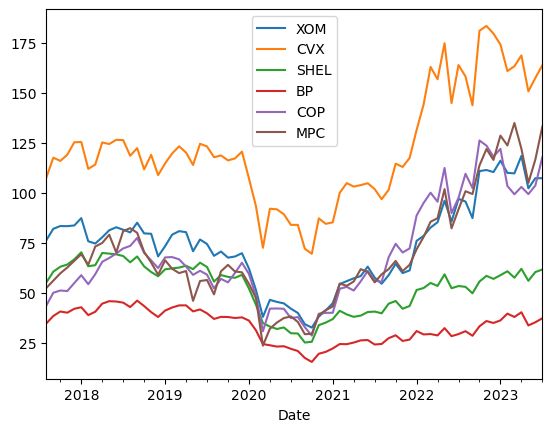

In [10]:
data.plot()

# the line regression between Gasoline price and oil company's stock price

In [12]:
# oil price in the US from FRED (https://fred.stlouisfed.org/)
csv_file_path_3 = 'Resources/OPEC-ORB.csv'

Gasoline_price_data = pd.read_csv(csv_file_path_3)
Gasoline_price_data

,Date,Value
0,2023-08-04,87.95
1,2023-08-03,85.47
2,2023-08-02,86.66
3,2023-08-01,86.60
4,2023-07-31,86.45
...,...,...
5308,2003-01-08,28.86
5309,2003-01-07,29.72
5310,2003-01-06,30.71
5311,2003-01-03,30.83


In [14]:
# clean Gasoline data by month
Gasoline_price_data['Date'] = pd.to_datetime(Gasoline_price_data['Date'])

# Filter the data to include only the desired date range
start_date = "2017-08-01"
end_date = "2023-08-01"
filtered_data = Gasoline_price_data[(Gasoline_price_data['Date'] >= start_date) & (Gasoline_price_data['Date'] <= end_date)]


# Set 'Date' as the index
filtered_data.set_index('Date', inplace=True)

# Resample to get the last date of each month
resampled_data = filtered_data.resample('M').last()


# Plot the resampled data
#plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
#plt.plot(resampled_data.index, resampled_data['Value'], label='Oil Prices (Last Day of Month)')
#plt.show()

In [15]:
resampled_data

,Value
Date,
2017-08-31,49.36
2017-09-30,55.20
2017-10-31,58.53
2017-11-30,61.06
2017-12-31,64.47
...,...
2023-04-30,79.98
2023-05-31,73.07
2023-06-30,76.14


In [16]:
#resampled_data.drop(resampled_data[-1], axis=1, inplace=True)
last_row_index = resampled_data.index[-1]

# Delete the last row
resampled_data.drop(last_row_index, inplace=True)
resampled_data

,Value
Date,
2017-08-31,49.36
2017-09-30,55.20
2017-10-31,58.53
2017-11-30,61.06
2017-12-31,64.47
...,...
2023-03-31,78.12
2023-04-30,79.98
2023-05-31,73.07


In [17]:
data

,XOM,CVX,SHEL,BP,COP,MPC
Date,,,,,,
2017-08-31,76.330002,107.620003,55.180000,34.730000,43.660000,52.450001
2017-09-30,81.980003,117.500000,60.580002,38.430000,50.049999,56.080002
2017-10-31,83.349998,115.889999,63.029999,40.669998,51.150002,59.740002
2017-11-30,83.290001,118.989998,64.120003,40.070000,50.880001,62.630001
2017-12-31,83.639999,125.190002,66.709999,42.029999,54.889999,65.980003
...,...,...,...,...,...,...
2023-03-31,109.660004,163.160004,57.540001,37.939999,99.209999,134.830002
2023-04-30,118.339996,168.580002,61.980000,40.279999,102.889999,122.000000
2023-05-31,102.180000,150.619995,56.000000,33.709999,99.300003,104.910004


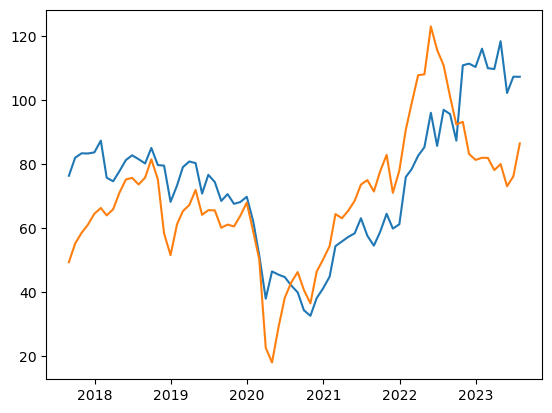

In [18]:
plt.plot(data.index, data["XOM"])
plt.plot(resampled_data.index, resampled_data['Value'])
plt.show()

In [19]:
# line regression function
def linear_reg_plt(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-",label="_nolegend_")
    return rvalue, line_eq

### Gasoline price vs.  Exxon Mobil Corporation (XOM)

The r-value is: 0.67


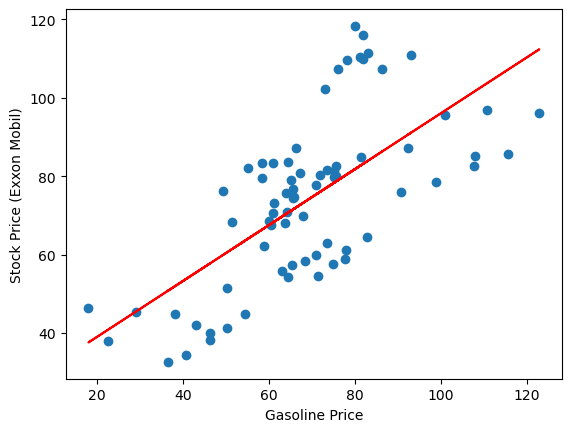

In [20]:
x_values = resampled_data["Value"]
y_values = data["XOM"]
rvalue, line_eq = linear_reg_plt(x_values,y_values)
#plt.title('Northern Hemisphere')
plt.xlabel('Gasoline Price')
plt.ylabel('Stock Price (Exxon Mobil)')
print(f"The r-value is: {round(rvalue,2)}")
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
plt.show()

### Gasoline price vs.  Chevron Corporation (CVX)

The r-value is: 0.79


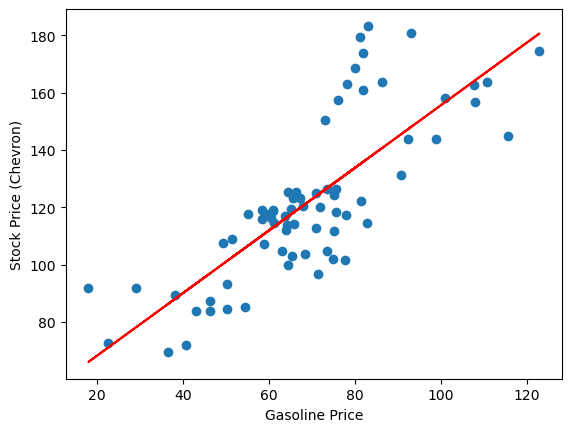

In [21]:
x_values = resampled_data["Value"]
y_values = data["CVX"]
rvalue, line_eq = linear_reg_plt(x_values,y_values)

plt.xlabel('Gasoline Price')
plt.ylabel('Stock Price (Chevron)')
print(f"The r-value is: {round(rvalue,2)}")
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
plt.show()

### Gasoline price vs. Shell plc (SHEL)

The r-value is: 0.44


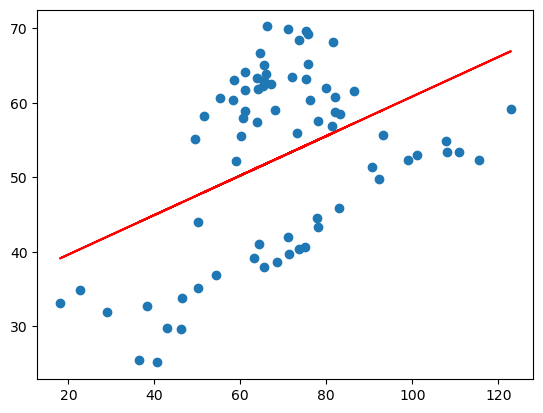

In [22]:
x_values = resampled_data["Value"]
y_values = data["SHEL"]
rvalue, line_eq = linear_reg_plt(x_values,y_values)
#plt.title('Northern Hemisphere')
#plt.xlabel('Latitude')
#plt.ylabel('Max Temp')
print(f"The r-value is: {round(rvalue,2)}")
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
plt.show()

### Gasoline price vs. BP p.l.c. (BP)

The r-value is: 0.23


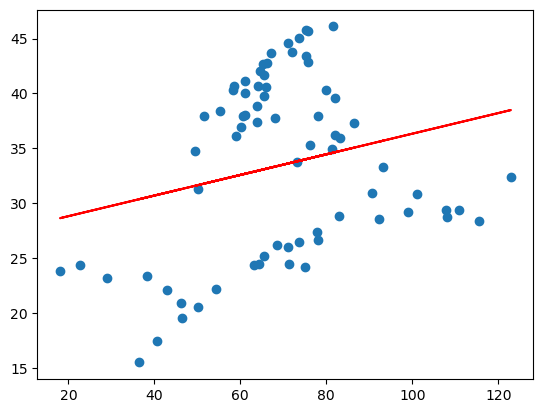

In [23]:
x_values = resampled_data["Value"]
y_values = data["BP"]
rvalue, line_eq = linear_reg_plt(x_values,y_values)
#plt.title('Northern Hemisphere')
#plt.xlabel('Latitude')
#plt.ylabel('Max Temp')
print(f"The r-value is: {round(rvalue,2)}")
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
plt.show()

### Gasoline price vs. ConocoPhillips (COP)

The r-value is: 0.81


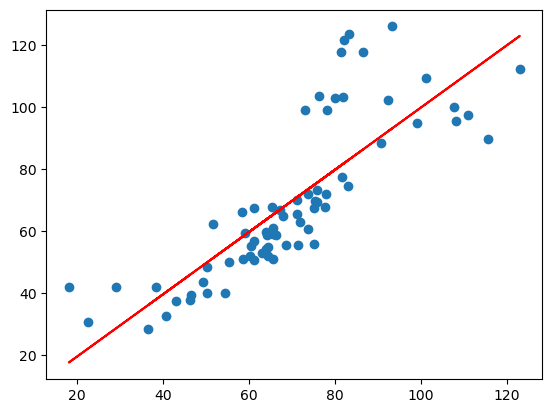

In [24]:
x_values = resampled_data["Value"]
y_values = data["COP"]
rvalue, line_eq = linear_reg_plt(x_values,y_values)
#plt.title('Northern Hemisphere')
#plt.xlabel('Latitude')
#plt.ylabel('Max Temp')
print(f"The r-value is: {round(rvalue,2)}")
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
plt.show()

### Gasoline price vs. Marathon Petroleum Corporation (MPC)

The r-value is: 0.72


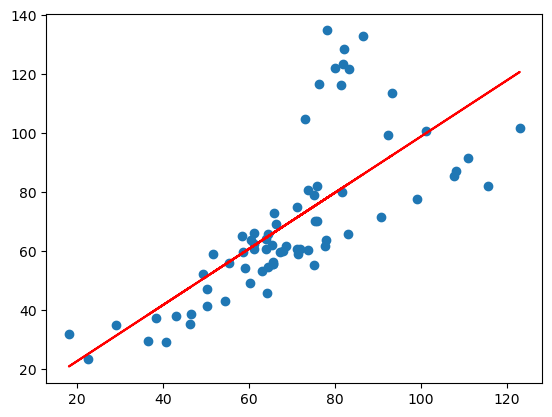

In [25]:
x_values = resampled_data["Value"]
y_values = data["MPC"]
rvalue, line_eq = linear_reg_plt(x_values,y_values)
#plt.title('Northern Hemisphere')
#plt.xlabel('Latitude')
#plt.ylabel('Max Temp')
print(f"The r-value is: {round(rvalue,2)}")
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
plt.show()